1. Perform data inspection and identify any missing or inconsistent values.

In [ ]:
import pandas as pd

#load dataset
file_path = '/content/Test2_dataset.xlsx'

#read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

#show first few rows
#print(df.head())

# Check for missing values in the dataset and print the total number of missing values for each column
missing_data = df.isnull().sum()

# Print the result
print("Total number of missing values for each column:")
print(missing_data)

Total number of missing values for each column:
Catalyst                         0
Ratio of CH4 in Feed             0
Reaction Temperature             0
Ni Loading                       0
Reaction Time                    0
Pore Size                        0
Pore Volume                      0
Surface Area                     0
H2-TPR Peak Temperature          0
Ni Particle Size                 0
Ni Dispersion                 1056
Modifier Electronegativity       0
GHSV                             0
CH4 Conversion                  49
CO2 Conversion                  77
Syngas_Ratio                    76
dtype: int64


2. Handle any missing data using appropriate techniques (e.g., fill missing values or remove incomplete rows).

In [ ]:
#replace ch4 conversion, co2 conversion, and syngas_ratio columns with means
#remove ni dispersion column since too many valuesa are missing

#imputing missingvalues with mean
df['CH4 Conversion'].fillna(df['CH4 Conversion'].mean(), inplace=True)
df['CO2 Conversion'].fillna(df['CO2 Conversion'].mean(), inplace=True)
df['Syngas_Ratio'].fillna(df['Syngas_Ratio'].mean(), inplace=True)

#remove ni dispersion column
df_cleaned = df.dropna()

# Check again for missing values in the dataset and print the total number of missing values for each column
missing_data = df_cleaned.isnull().sum()

# Print the result
print("Total number of missing values for each column:")
print(missing_data)

Total number of missing values for each column:
Catalyst                      0
Ratio of CH4 in Feed          0
Reaction Temperature          0
Ni Loading                    0
Reaction Time                 0
Pore Size                     0
Pore Volume                   0
Surface Area                  0
H2-TPR Peak Temperature       0
Ni Particle Size              0
Ni Dispersion                 0
Modifier Electronegativity    0
GHSV                          0
CH4 Conversion                0
CO2 Conversion                0
Syngas_Ratio                  0
dtype: int64


3. Apply data transformation techniques, such as normalization or encoding categorical variables, to prepare the data for machine learning tasks.

In [ ]:
#identify catergorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

#display categorical columns
categorical_columns

#apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df_cleaned,columns=categorical_columns,drop_first=True)

#display the first few rows of the encoded dataset
df_encoded.head()

,Ratio of CH4 in Feed,Reaction Temperature,Ni Loading,Reaction Time,Pore Size,Pore Volume,Surface Area,H2-TPR Peak Temperature,Ni Particle Size,Ni Dispersion,...,Catalyst_Y,Catalyst_Y-Ni/MgAl,Catalyst_Y2O3/10Ni/SBA-15,Catalyst_Y–2%Nd2O3,Catalyst_Y–2.5%Nd2O3,Catalyst_Y–3%Nd2O3,Catalyst_Y–3.5%Nd2O3,Catalyst_Y–4%Nd2O,Catalyst_Y–Ni/SBA-16-MgO,Catalyst_ZrO2/10Ni/SBA-15
17,0.15,800,4.09,120.0,19.7,0.70,129.9,790.0,3.3,15.9,...,False,False,False,False,False,False,False,False,False,False
18,0.15,800,4.68,120.0,20.9,0.69,128.7,786.0,6.3,15.3,...,False,False,False,False,False,False,False,False,False,False
19,0.15,800,3.64,120.0,23.9,0.66,123.3,785.0,9.2,13.2,...,False,False,False,False,False,False,False,False,False,False
20,0.15,800,4.23,120.0,25.4,0.62,93.4,782.0,11.1,9.3,...,False,False,False,False,False,False,False,False,False,False
21,0.15,800,4.09,60.0,19.7,0.70,129.9,790.0,3.3,15.9,...,False,False,False,False,False,False,False,False,False,False


4. Generate summary statistics (mean, median, standard deviation, etc.) for the dataset.

In [ ]:
# Calculate statistics for numeric columns
numeric_cols = df_cleaned.select_dtypes(include='number')

# Mean
mean_values = numeric_cols.mean()

# Median
median_values = numeric_cols.median()

# Standard Deviation
std_values = numeric_cols.std()

# Min and Max
min_values = numeric_cols.min()
max_values = numeric_cols.max()

# Interquartile Range (IQR)
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
iqr_values = Q3 - Q1

# Display the results
stats_summary = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_values,
    'Min': min_values,
    'Max': max_values,
    'Interquartile Range (IQR)': iqr_values
})

print(stats_summary)

                                    Mean        Median  Standard Deviation  \
Ratio of CH4 in Feed            0.372225      0.400000            0.143152   
Reaction Temperature          700.015198    700.000000           78.737178   
Ni Loading                      9.551094     10.000000            5.623041   
Reaction Time                  18.148526      7.000000           25.970680   
Pore Size                      11.083305      8.000000            8.547709   
Pore Volume                     0.425965      0.400000            0.277773   
Surface Area                  194.028085    141.000000          158.350520   
H2-TPR Peak Temperature       649.390532    690.000000          167.321931   
Ni Particle Size               12.334681     10.000000            9.756412   
Ni Dispersion                   9.886117      8.900000            7.930817   
Modifier Electronegativity      0.412795      0.000000            0.589039   
GHSV                        49221.580547  30000.000000        54

5. Create visualizations (scatter plots, histograms, box plots) to identify trends and relationships between variables.
6. Analyze the correlations between features and target variables (CH₄ Conversion, CO₂ Conversion, and Syngas Ratio).

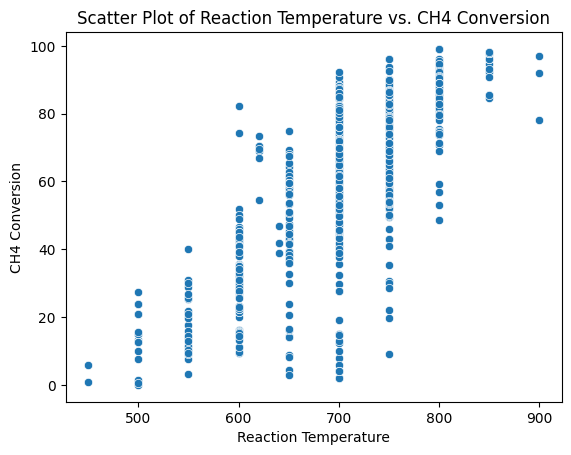

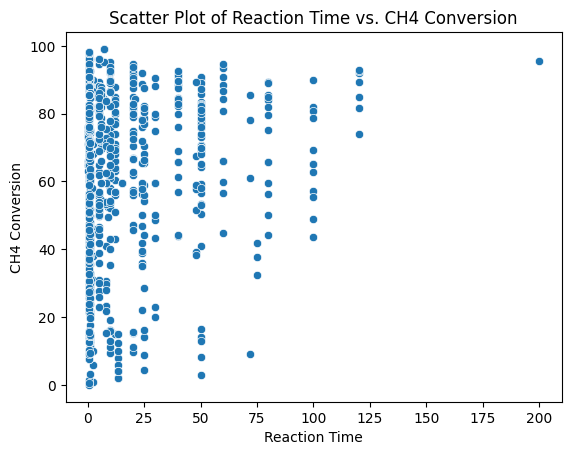

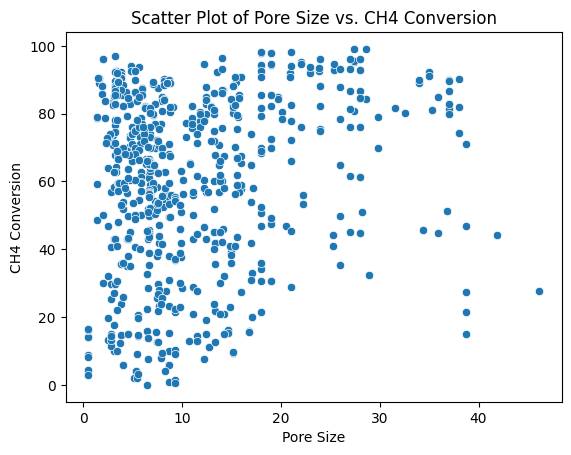

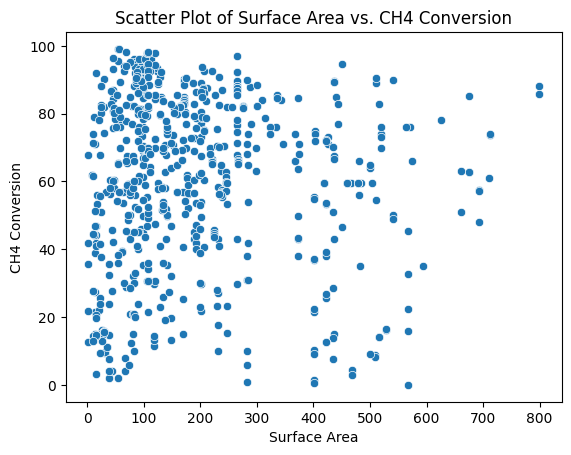

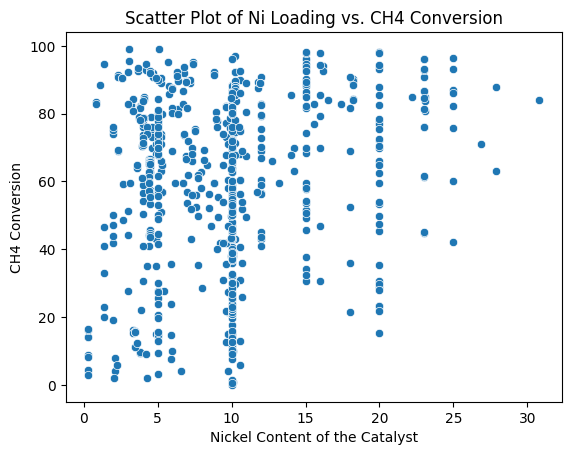

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#create scatter plots relating chosen variables to CH4 Conversion
#temperature
sns.scatterplot(x='Reaction Temperature', y='CH4 Conversion', data=df_cleaned)
plt.title('Scatter Plot of Reaction Temperature vs. CH4 Conversion')
plt.xlabel('Reaction Temperature')
plt.ylabel('CH4 Conversion')
plt.show()

#rxn time
sns.scatterplot(x='Reaction Time', y='CH4 Conversion', data=df_cleaned)
plt.title('Scatter Plot of Reaction Time vs. CH4 Conversion')
plt.xlabel('Reaction Time')
plt.ylabel('CH4 Conversion')
plt.show()

#pore size
sns.scatterplot(x='Pore Size', y='CH4 Conversion', data=df_cleaned)
plt.title('Scatter Plot of Pore Size vs. CH4 Conversion')
plt.xlabel('Pore Size')
plt.ylabel('CH4 Conversion')
plt.show()

#surface area
sns.scatterplot(x='Surface Area', y='CH4 Conversion', data=df_cleaned)
plt.title('Scatter Plot of Surface Area vs. CH4 Conversion')
plt.xlabel('Surface Area')
plt.ylabel('CH4 Conversion')
plt.show()

#Ni Loading (nickel content)
sns.scatterplot(x='Ni Loading', y='CH4 Conversion', data=df_cleaned)
plt.title('Scatter Plot of Ni Loading vs. CH4 Conversion')
plt.xlabel('Nickel Content of the Catalyst')
plt.ylabel('CH4 Conversion')
plt.show()

As temp increased, CH4 Conversion increased

As reaction time increased, CH4 Conversion increased

As pore size increased, CH4 Conversion slightly increased

There is no notable correlation between surface area and CH4 Conversion

As Nickel content of the catalyst increased, CH4 Conversion increased

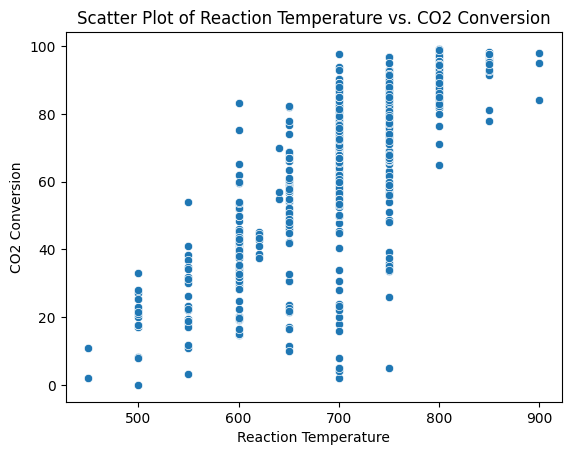

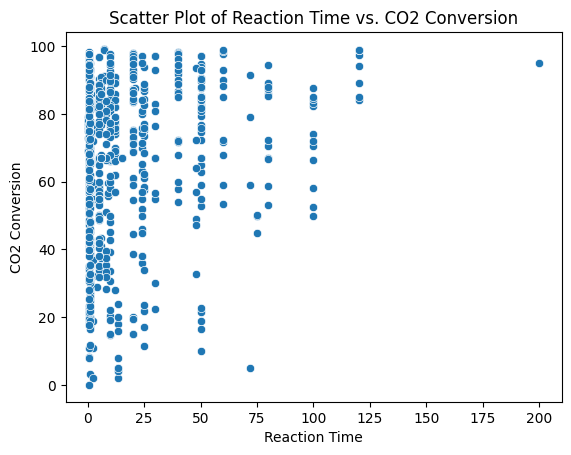

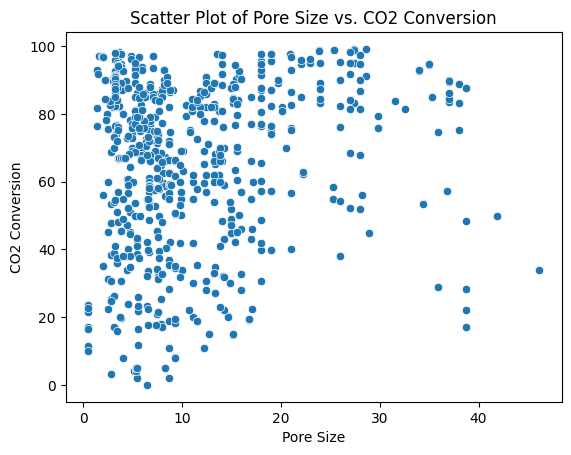

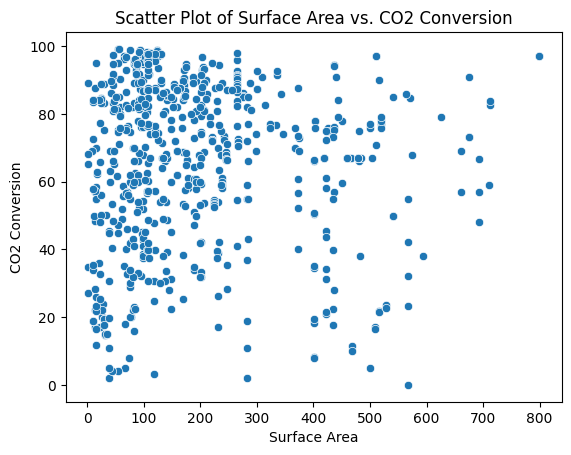

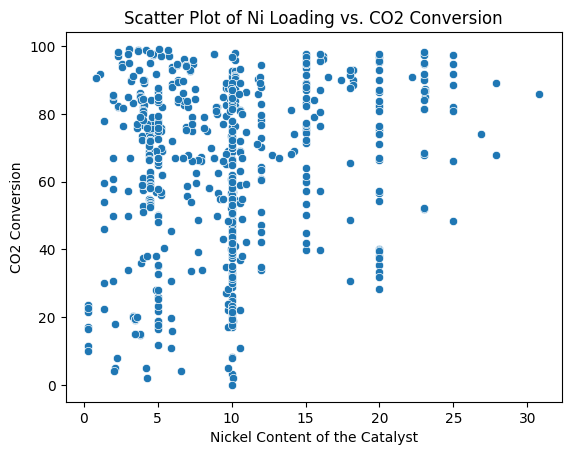

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#create scatter plots relating chosen variables to CO2 Conversion
#temp
sns.scatterplot(x='Reaction Temperature', y='CO2 Conversion', data=df_cleaned)
plt.title('Scatter Plot of Reaction Temperature vs. CO2 Conversion')
plt.xlabel('Reaction Temperature')
plt.ylabel('CO2 Conversion')
plt.show()

#rxn time
sns.scatterplot(x='Reaction Time', y='CO2 Conversion', data=df_cleaned)
plt.title('Scatter Plot of Reaction Time vs. CO2 Conversion')
plt.xlabel('Reaction Time')
plt.ylabel('CO2 Conversion')
plt.show()

#pore size
sns.scatterplot(x='Pore Size', y='CO2 Conversion', data=df_cleaned)
plt.title('Scatter Plot of Pore Size vs. CO2 Conversion')
plt.xlabel('Pore Size')
plt.ylabel('CO2 Conversion')
plt.show()

#surface area
sns.scatterplot(x='Surface Area', y='CO2 Conversion', data=df_cleaned)
plt.title('Scatter Plot of Surface Area vs. CO2 Conversion')
plt.xlabel('Surface Area')
plt.ylabel('CO2 Conversion')
plt.show()

#Ni Loading
sns.scatterplot(x='Ni Loading', y='CO2 Conversion', data=df_cleaned)
plt.title('Scatter Plot of Ni Loading vs. CO2 Conversion')
plt.xlabel('Nickel Content of the Catalyst')
plt.ylabel('CO2 Conversion')
plt.show()

As temp increased, CO2 Conversion increased

As reaction time increased, CO2 Conversion increased

As pore size increased, CO2 Conversion slightly increased

There is no notable correlation between surface area and CO2 Conversion

As Nickel content of the catalyst increased, CO2 Conversion increased

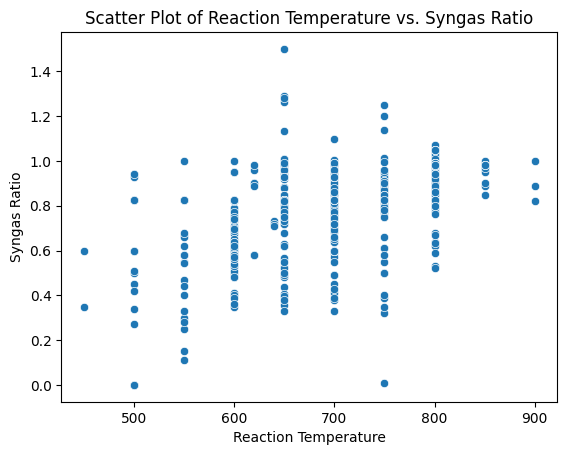

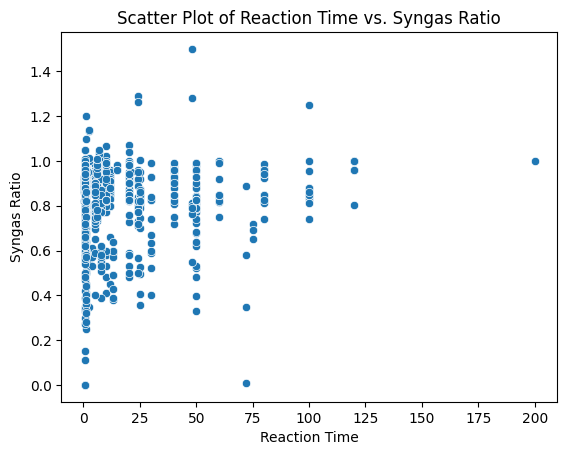

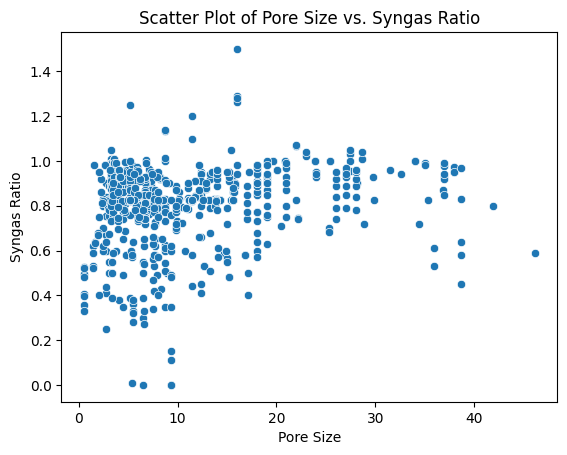

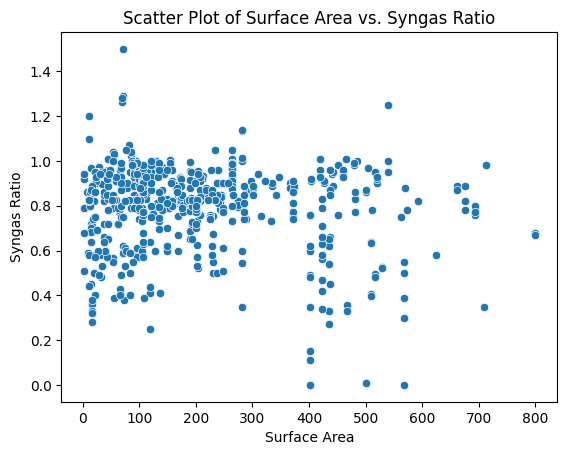

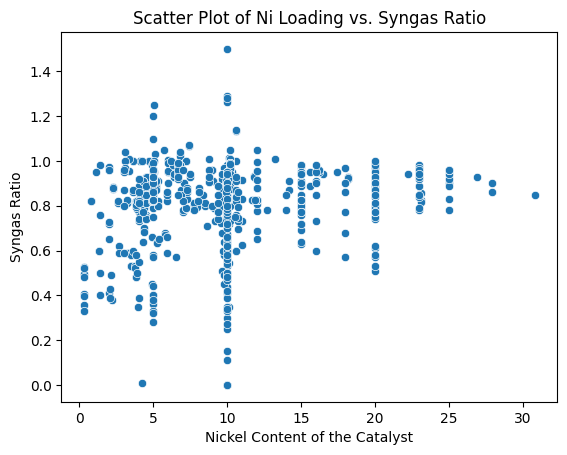

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#create scatter plots relating chosen variables to Syngas Ratio
#temp
sns.scatterplot(x='Reaction Temperature', y='Syngas_Ratio', data=df_cleaned)
plt.title('Scatter Plot of Reaction Temperature vs. Syngas Ratio')
plt.xlabel('Reaction Temperature')
plt.ylabel('Syngas Ratio')
plt.show()

#rxn time
sns.scatterplot(x='Reaction Time', y='Syngas_Ratio', data=df_cleaned)
plt.title('Scatter Plot of Reaction Time vs. Syngas Ratio')
plt.xlabel('Reaction Time')
plt.ylabel('Syngas Ratio')
plt.show()

#pore size
sns.scatterplot(x='Pore Size', y='Syngas_Ratio', data=df_cleaned)
plt.title('Scatter Plot of Pore Size vs. Syngas Ratio')
plt.xlabel('Pore Size')
plt.ylabel('Syngas Ratio')
plt.show()

#surface area
sns.scatterplot(x='Surface Area', y='Syngas_Ratio', data=df_cleaned)
plt.title('Scatter Plot of Surface Area vs. Syngas Ratio')
plt.xlabel('Surface Area')
plt.ylabel('Syngas Ratio')
plt.show()

#Ni Loading
sns.scatterplot(x='Ni Loading', y='Syngas_Ratio', data=df_cleaned)
plt.title('Scatter Plot of Ni Loading vs. Syngas Ratio')
plt.xlabel('Nickel Content of the Catalyst')
plt.ylabel('Syngas Ratio')
plt.show()

As temp increased, the Syngas Raio increased

As reaction time increased, the Syngas Raio increased

As the pore size increased, the Syngas Ratio slightly increased

The surface area and Syngas Ratio show no notable trends

As the nickel content in the catalyist increased, the Syngas Ratio slightly increased